In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from scipy.stats import norm
from quanqual import QUANQUAL
#import warnings
#warnings.filterwarnings('ignore')

<h2>Features</h2>
<h3>age</h3>
<h3>sex</h3>
<h3>chest pain type (4 values)</h3>
<h3>resting blood pressure</h3>
<h3>serum cholestoral in mg/dl</h3>
<h3>fasting blood sugar > 120 mg/dl</h3>
<h3>resting electrocardiographic results (values 0,1,2)</h3>
<h3>maximum heart rate achieved</h3>
<h3>exercise induced angina</h3>
<h3>oldpeak = ST depression induced by exercise relative to rest</h3>
<h3>the slope of the peak exercise ST segment</h3>
<h3>number of major vessels (0-3) colored by flourosopy</h3>
<h3>thal: 3 = normal; 6 = fixed defect; 7 = reversable defect</h3>


In [2]:
dataset=pd.read_csv("heart.csv")

In [3]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
quan,qual=QUANQUAL.QuanQual(dataset)

In [6]:
QUANQUAL.describe1(dataset,quan)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
mean,54.434146,0.69561,0.942439,131.611707,246.0,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
median,56.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,0.8,1.0,0.0,2.0,1.0
mode,58,1,0,120,204,0,1,162,0,0.0,1,0,2,1
Q1:25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,132.0,0.0,0.0,1.0,0.0,2.0,0.0
Q2:50%,56.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,0.8,1.0,0.0,2.0,1.0
Q3:75%,61.0,1.0,2.0,140.0,275.0,0.0,1.0,166.0,1.0,1.8,2.0,1.0,3.0,1.0
Q4:100%,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0,3.0,1.0
IQR,13.0,1.0,2.0,20.0,64.0,0.0,1.0,34.0,1.0,1.8,1.0,1.0,1.0,1.0
1.5rule,19.5,1.5,3.0,30.0,96.0,0.0,1.5,51.0,1.5,2.7,1.5,1.5,1.5,1.5
Lessor,28.5,-1.5,-3.0,90.0,115.0,0.0,-1.5,81.0,-1.5,-2.7,-0.5,-1.5,0.5,-1.5


In [7]:
QUANQUAL.FreqTable('age',dataset)

,Unique_values,Frequency,Relative_Freqency,Cumlative
0,58,68,0.066341,0.066341
1,57,57,0.055610,0.121951
2,54,53,0.051707,0.173659
3,59,46,0.044878,0.218537
4,52,43,0.041951,0.260488
5,51,39,0.038049,0.298537
6,56,39,0.038049,0.336585
7,62,37,0.036098,0.372683
8,60,37,0.036098,0.408780
9,44,36,0.035122,0.443902


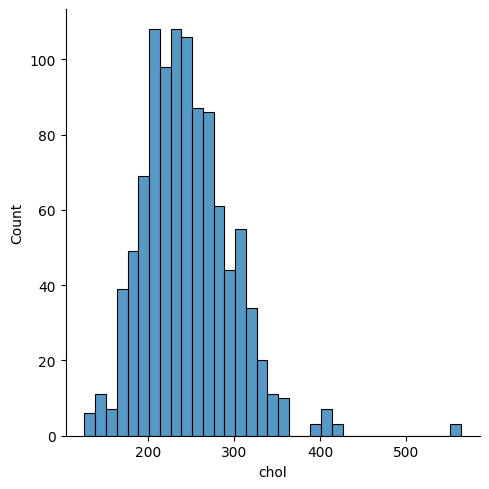

In [8]:
sns.displot(dataset['chol'])

Mean=246.000, Standerd Deviation=51.593
The area between range(200,300):0.6664170171398828


F:\artifical intelligence\project\mavin\datasecince\quanqual.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


0.6664170171398828

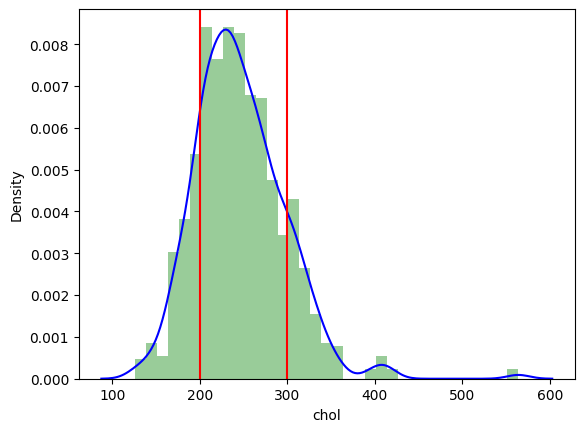

In [11]:
QUANQUAL.get_pdf_probability(dataset['chol'],200,300)

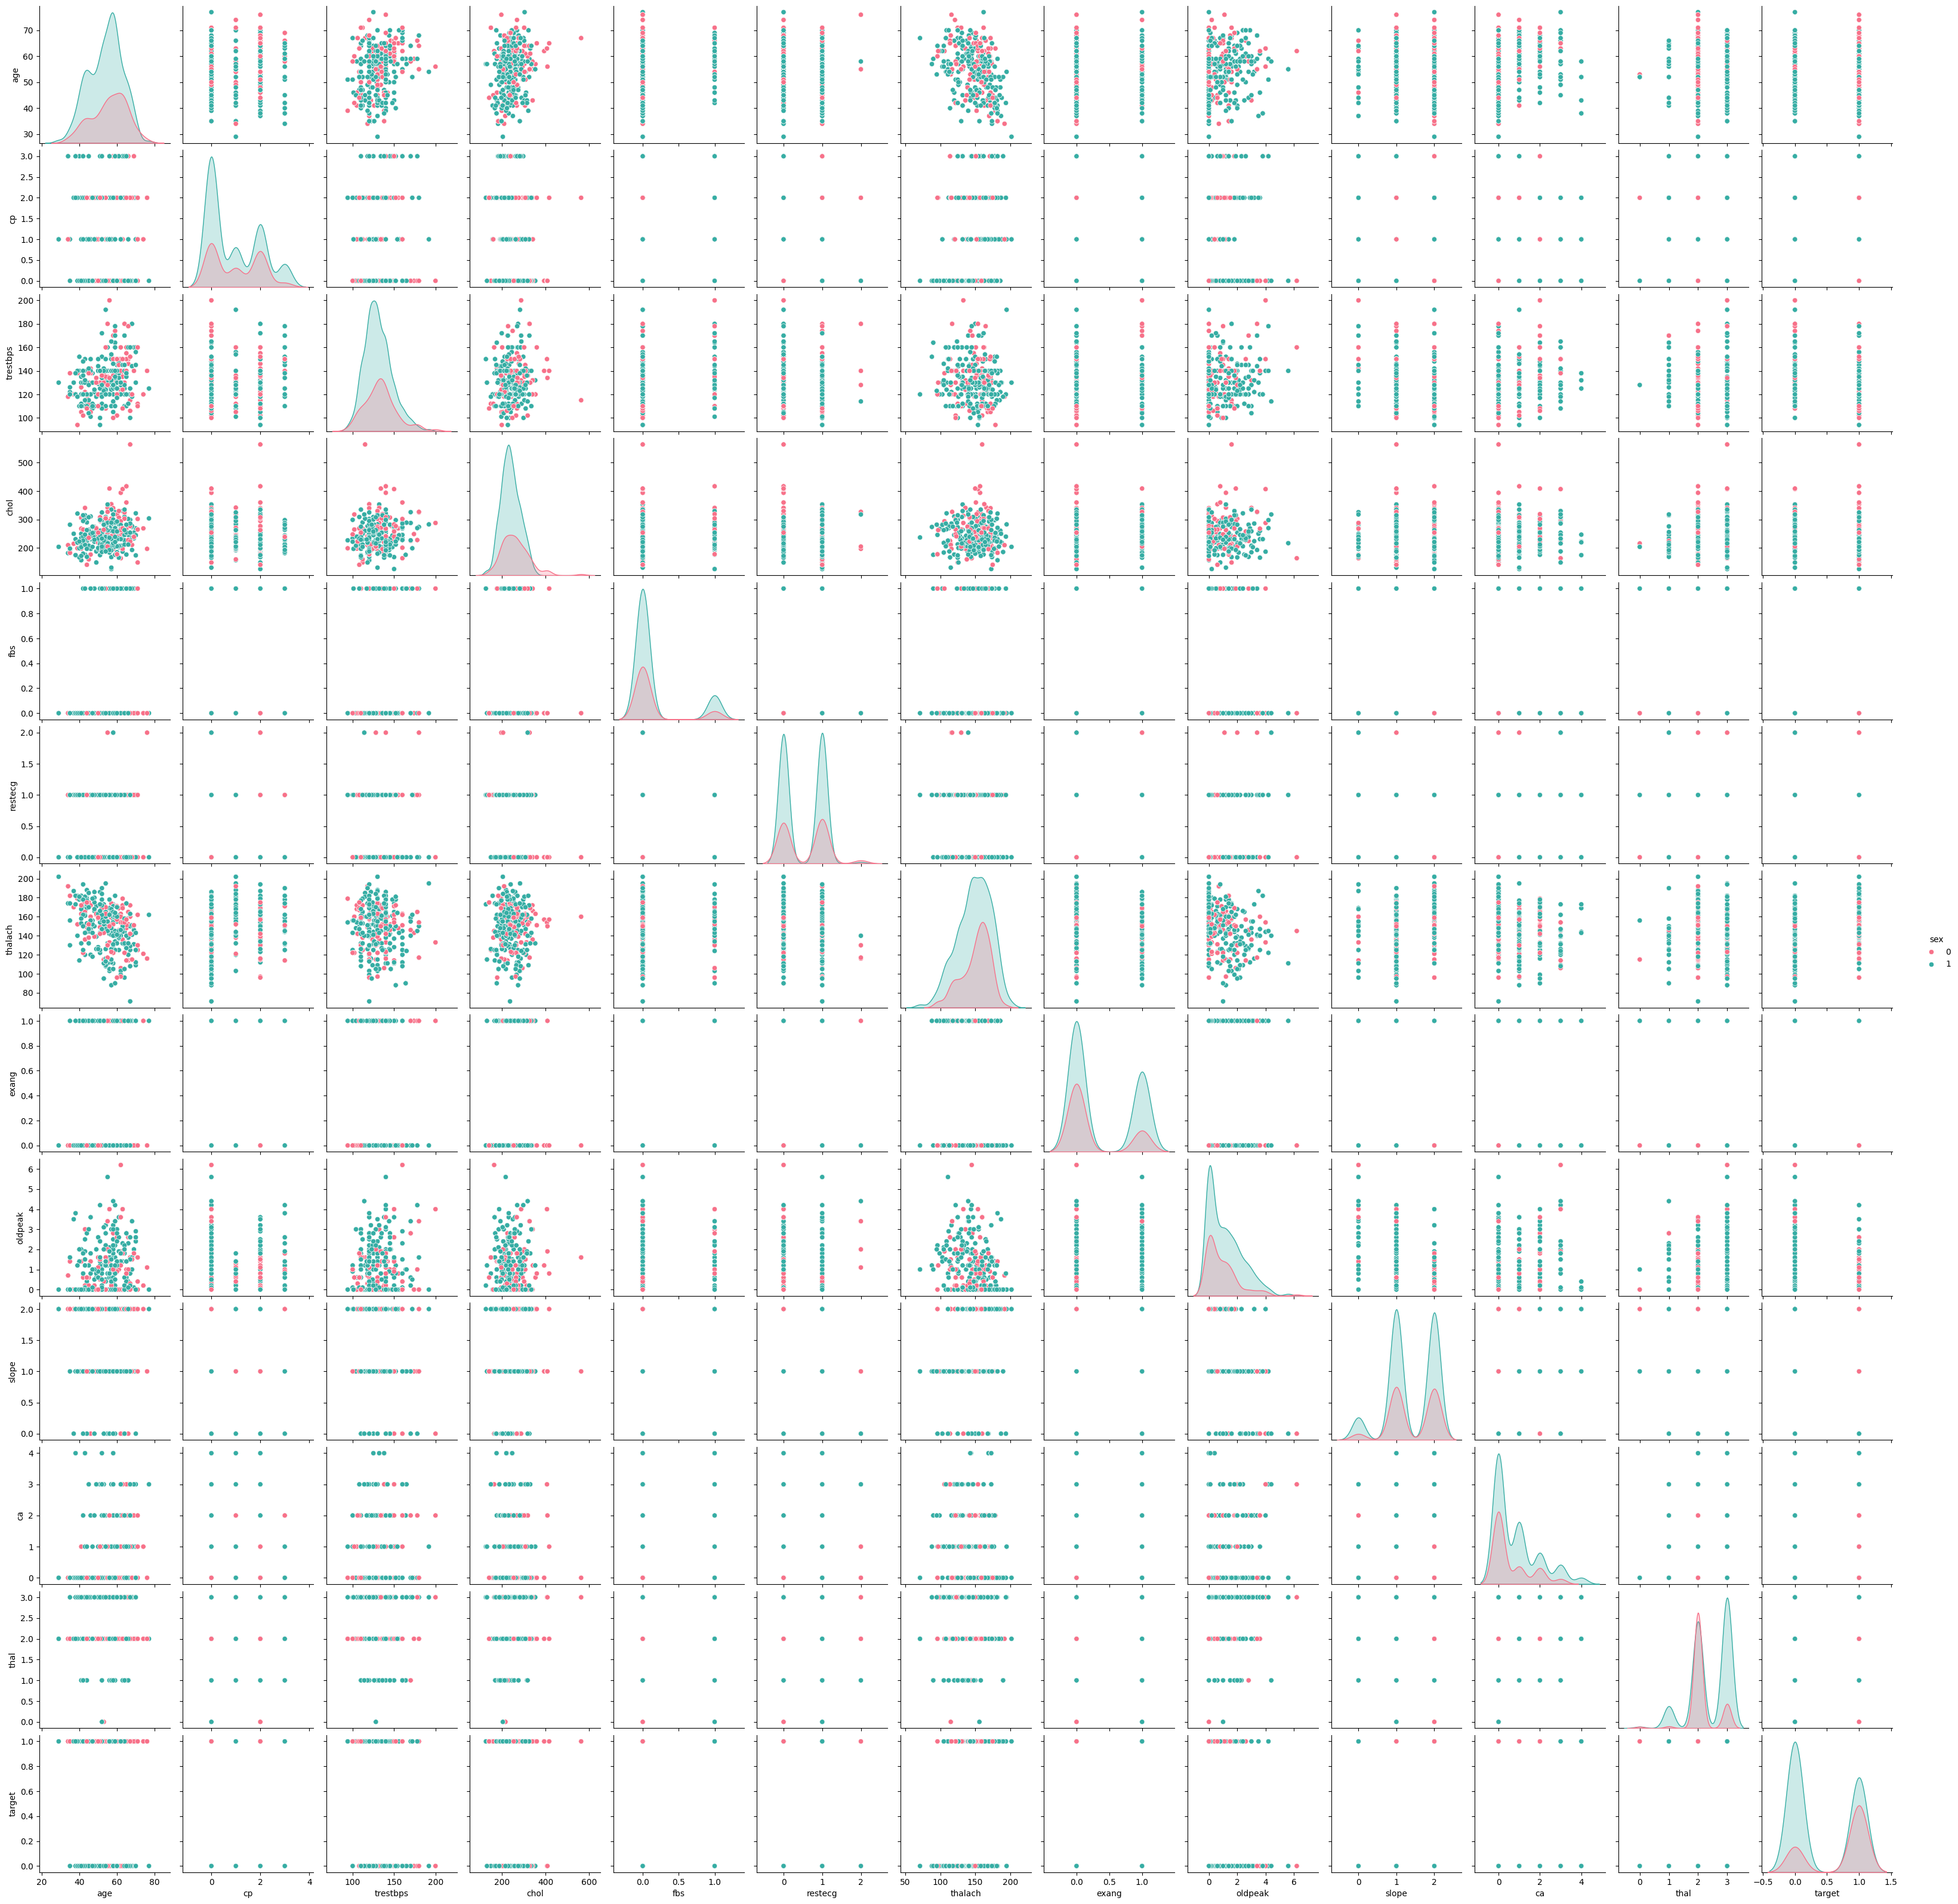

In [12]:
sns.pairplot(dataset,hue='sex',diag_kind='kde',kind='scatter',palette='husl')

<Axes: xlabel='target', ylabel='cp'>

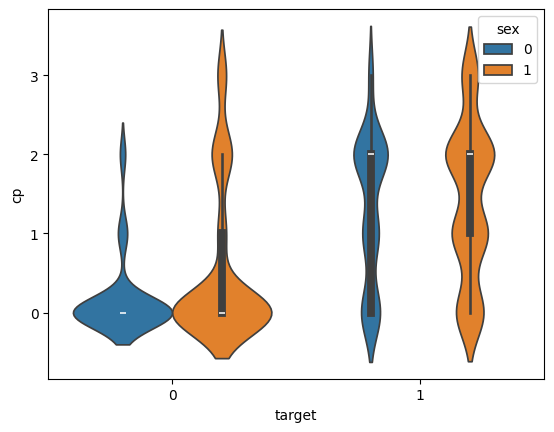

In [13]:
sns.violinplot(x='target',y='cp',data=dataset,hue='sex')

In [14]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [15]:
independant=dataset[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]

In [16]:
independant

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [17]:
dependant=dataset[['target']]

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independant,dependant,test_size=0.30,random_state=0)

In [19]:
# standardisation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

<h2>1.Support Vector Mechine</h2>

In [20]:
#svm is a used to non-linear function(slu : linear,non-linear)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid={'kernel':['linear','rbf','poly','sigmoid'],
            'gamma':['auto','scale'],
            'C':[10,100,1000,2000,3000]}

grid=GridSearchCV(SVC(),param_grid,cv=3,verbose=1,n_jobs=-1)
grid.fit(X_train,Y_train)

SVM_grid_predictions=grid.predict(X_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,SVM_grid_predictions)
print(cm)

from sklearn.metrics import classification_report
clf_report=classification_report(Y_test,SVM_grid_predictions)
print(clf_report)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[[145   0]
 [  0 163]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       163

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<h2>2.DecisionTreeClassification</h2>

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

para_grid={'criterion':['gini','entropy'],
           'max_features':['auto','sqrt','log2'],
           'splitter':['best','random']}
grid=GridSearchCV(DecisionTreeClassifier(),para_grid,refit=True,verbose=3,n_jobs=-1,scoring='f1_weighted')
grid.fit(X_train,Y_train)

DT_C_grid_prediction=grid.predict(X_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,DT_C_grid_prediction)
print(cm)

from sklearn.metrics import classification_report
clf_report=classification_report(Y_test,DT_C_grid_prediction)

print(clf_report)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[[145   0]
 [  6 157]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       145
           1       1.00      0.96      0.98       163

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

<h2>3.RandomForest</h2>

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid={'criterion':['gini','entropy'],
           'max_features':['auto','sqrt','log2'],
           'n_estimators':[10,100]}
RF_grid=GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3,n_jobs=-1,scoring='f1')
RF_grid.fit(X_train,Y_train)

RF_C_grid_prediction=RF_grid.predict(X_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,RF_C_grid_prediction)
print(cm)

from sklearn.metrics import classification_report
clf_report=classification_report(Y_test,RF_C_grid_prediction)

print(clf_report)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

[[145   0]
 [  0 163]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       163

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



<h2>4.LogisticRegression</h2>

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
paran_grid={'solver':['newton-cg','lbfgs','liblinear','saga'],
            'penalty':['l2']}
grid=GridSearchCV(LogisticRegression(),paran_grid,refit=True, verbose=3,n_jobs=-1,scoring='f1_weighted')
grid.fit(X_train,Y_train)

LOGI_R_C_grid_prediction=grid.predict(X_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,LOGI_R_C_grid_prediction)

from sklearn.metrics import classification_report
clf_report=classification_report(Y_test,LOGI_R_C_grid_prediction)

print(clf_report)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       145
           1       0.84      0.92      0.88       163

    accuracy                           0.87       308
   macro avg       0.87      0.86      0.87       308
weighted avg       0.87      0.87      0.87       308



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<h2>5.KNN</h2>

In [24]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Classification=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
KNN_Classification.fit(X_train,Y_train)

KNN_y_pred=KNN_Classification.predict(X_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,KNN_y_pred)
print(cm)


from sklearn.metrics import classification_report
clf_report=classification_report(Y_test,KNN_y_pred)

print(clf_report)


[[122  23]
 [ 16 147]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       145
           1       0.86      0.90      0.88       163

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.87      0.87      0.87       308



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<h2>6.Navie Bayes</h2>

In [25]:
from sklearn.naive_bayes import GaussianNB
Nav_bayes=GaussianNB()
Nav_bayes.fit(X_train,Y_train)

y_pred=Nav_bayes.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
print(cm)

from sklearn.metrics import classification_report
clf_report=classification_report(Y_test,y_pred)
print(clf_report)

[[118  27]
 [ 21 142]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       145
           1       0.84      0.87      0.86       163

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
import pickle
filename="finalized_model_randomForest.sav"
pickle.dump(RF_grid,open(filename,"wb"))

In [30]:
loaded_model=pickle.load(open("finalized_model_randomForest.sav","rb"))
result=loaded_model.predict([[52,1,0,125,212,0,1,168,0,1.0,2,2,3]])

In [31]:
result

array([0], dtype=int64)